# Hiding Sensitive Information Inside Images using LSB + AES Steganography

In This project, I have demonstrated how to securely embed encrypted messages into image files using a combination of **AES encryption** and **Least Significant Bit (LSB) steganography**.

## Step 1: Install & Import Required Libraries

In [35]:
# Install dependencies (uncomment and run once if needed)
# !pip install opencv-python numpy pycryptodome matplotlib

# Import libraries
import cv2
import numpy as np
import hashlib
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import matplotlib.pyplot as plt


## Step 2: Define Helper Functions for AES

In [36]:
def derive_key(userkey):
    """Derives a 16-byte AES key from the user password using SHA-256"""
    return hashlib.sha256(userkey.encode()).digest()[:16]

def encrypt_message(msg, userkey):
    """Encrypts the message using AES CBC mode"""
    key = derive_key(userkey)
    cipher = AES.new(key, AES.MODE_CBC)
    ct = cipher.encrypt(pad(msg.encode(), AES.block_size))
    return cipher.iv + ct

def decrypt_message(cipher_bytes, userkey):
    """Decrypts the message using AES CBC mode"""
    key = derive_key(userkey)
    iv = cipher_bytes[:16]
    ct = cipher_bytes[16:]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    return unpad(cipher.decrypt(ct), AES.block_size).decode()

## Step 3: Load the Image and Define Inputs

In [37]:
image_path = "cover.png"  # Use a valid image in your working directory
image = cv2.imread(image_path)
x = image.copy()

key = input("Enter The Key For Encode The Information")
text = input("Enter The Text Information You Want to hide inside Image")

## Step 4: Encrypt the Message

In [38]:
encrypted_bytes = encrypt_message(text, key)
print("Encrypted Bytes Length:", len(encrypted_bytes))

Encrypted Bytes Length: 80


## Step 5: Embed the Encrypted Message using LSB

In [39]:
n, m, z = 0, 0, 0
for byte in encrypted_bytes:
    for bit_pos in range(8):
        bit = (byte >> (7 - bit_pos)) & 1
        x[n, m, z] = (x[n, m, z] & 0xFE) | bit # Set LSB to bit
        z = (z + 1) % 3
        if z == 0:
            m += 1
            if m == x.shape[1]:
                m = 0
                n += 1

## Step 6: Save and Display the Stego Image

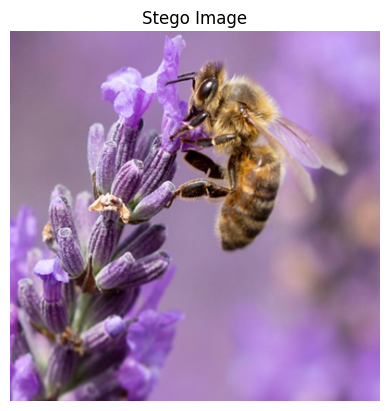

In [40]:
cv2.imwrite("stego_lsb_aes.png", x)
plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
plt.title("Stego Image")
plt.axis('off')
plt.show()

## Step 7: Extract the Encrypted Message from the Stego Image

In [41]:
n, m, z = 0, 0, 0
decoded_bytes = bytearray()
for _ in range(len(encrypted_bytes)):
    byte = 0
    for bit_pos in range(8):
        bit = x[n, m, z] & 1
        byte = (byte << 1) | bit
        z = (z + 1) % 3
        if z == 0:
            m += 1
            if m == x.shape[1]:
                m = 0
                n += 1
    decoded_bytes.append(byte)

## Step 8: Decrypt the Retrieved Message

In [42]:
key = input("Enter The Same Key For Decode The Information")
recovered_text = decrypt_message(bytes(decoded_bytes), key)
print("\nDecrypted Message:", recovered_text)


Decrypted Message: I am a CyberSecurity Intern at Edunet Foundation!


## Conclusion
- We successfully implemented **AES encryption** combined with **LSB steganography**.
- The message was encrypted before embedding, providing confidentiality.
- Bit-wise hiding in the image pixels ensures the message is visually undetectable.

> This hybrid method enhances both **security** and **stealth**, making it suitable for secure and covert data communication.